In [35]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
df = pd.read_csv("Dataset.csv")

In [5]:
df.head()

,Date,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume
0,1/2/2018,14982.09961,12902.71973,7006.899902,3742.0,1.684660e+10,3397430000,1929700000,497857
1,1/3/2018,15201.00000,12957.28027,7065.529785,3749.0,1.687190e+10,3544030000,2173130000,1009997
2,1/4/2018,15599.20020,13028.45996,7077.910156,3749.0,2.178320e+10,3697340000,2103220000,669448
3,1/5/2018,17429.50000,13103.23047,7136.560059,3758.0,2.384090e+10,3239280000,2024000000,2225274
4,1/8/2018,15170.09961,13114.34961,7157.390137,3744.0,1.841390e+10,3246160000,2055010000,930995


In [6]:
df.tail()

,Date,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume
1254,12/23/2022,16796.95313,15188.45020,10497.86035,7130.0,1.532927e+10,2819280000,3544680000,141614
1255,12/27/2022,16717.17383,15218.25977,10353.23047,7130.0,1.574858e+10,3030300000,3827290000,141614
1256,12/28/2022,16552.57227,15037.32031,10213.29004,7128.0,1.700571e+10,3083520000,3842970000,490323
1257,12/29/2022,16642.34180,15241.20996,10478.08984,7212.0,1.447224e+10,3003680000,4154100000,457006
1258,12/30/2022,16602.58594,15184.30957,10466.48047,7136.0,1.592916e+10,2979870000,3959030000,226505


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1259 non-null   object 
 1   BTC            1259 non-null   float64
 2   NYSE           1259 non-null   float64
 3   NASDAQ         1259 non-null   float64
 4   LSE            1259 non-null   float64
 5   BTC_Volume     1259 non-null   float64
 6   NYSE_Volume    1259 non-null   int64  
 7   NASDAQ_Volume  1259 non-null   int64  
 8   LSE_Volume     1259 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 88.6+ KB


In [8]:
df.describe()

,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1.259000e+03,1.259000e+03,1.259000e+03
mean,20364.167265,13970.639288,10434.897972,6744.801312,2.816945e+10,4.230836e+09,3.700598e+09,8.657402e+05
std,17006.251216,1767.351726,2797.163873,1637.805989,2.112494e+10,1.081698e+09,1.540865e+09,6.673056e+05
min,3242.484863,8777.379883,6192.919922,3649.000000,3.230550e+09,1.296530e+09,9.589500e+08,1.402000e+04
25%,7774.829589,12676.600100,7838.044922,4806.000000,1.381063e+10,3.523815e+09,2.242010e+09,5.001880e+05
50%,10944.585940,13300.269530,10207.629880,7254.000000,2.604323e+10,3.995250e+09,3.830200e+09,7.052710e+05
75%,33576.833985,15540.665040,13034.054690,7970.000000,3.767768e+10,4.683670e+09,4.699590e+09,1.027788e+06
max,67566.828130,17353.759770,16057.440430,9910.000000,3.509680e+11,9.976520e+09,1.162119e+10,1.117657e+07


In [9]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [10]:
df['BTC'].std()

17006.251216089884

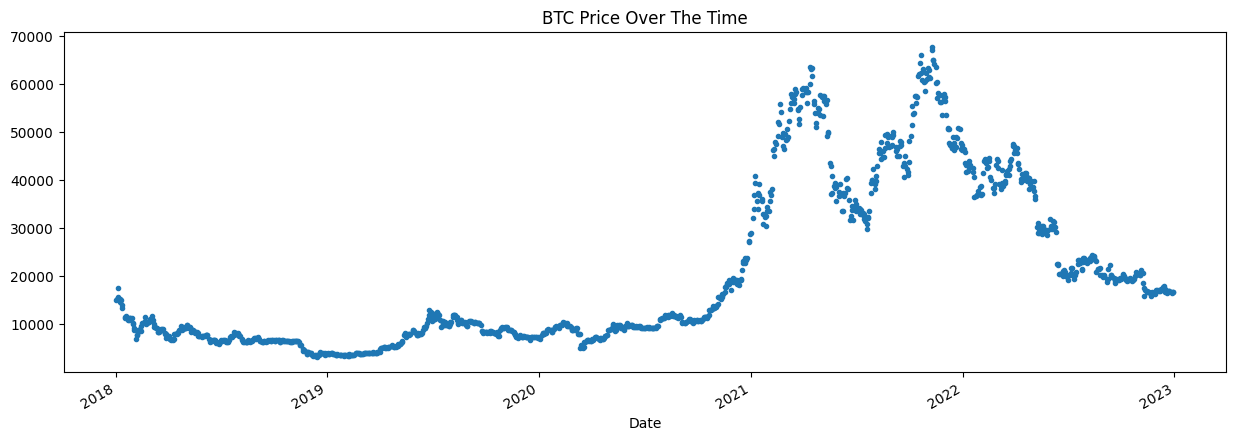

In [12]:
df['BTC'].plot(style='.',
        figsize=(15, 5), 
        title='BTC Price Over The Time')
plt.show()

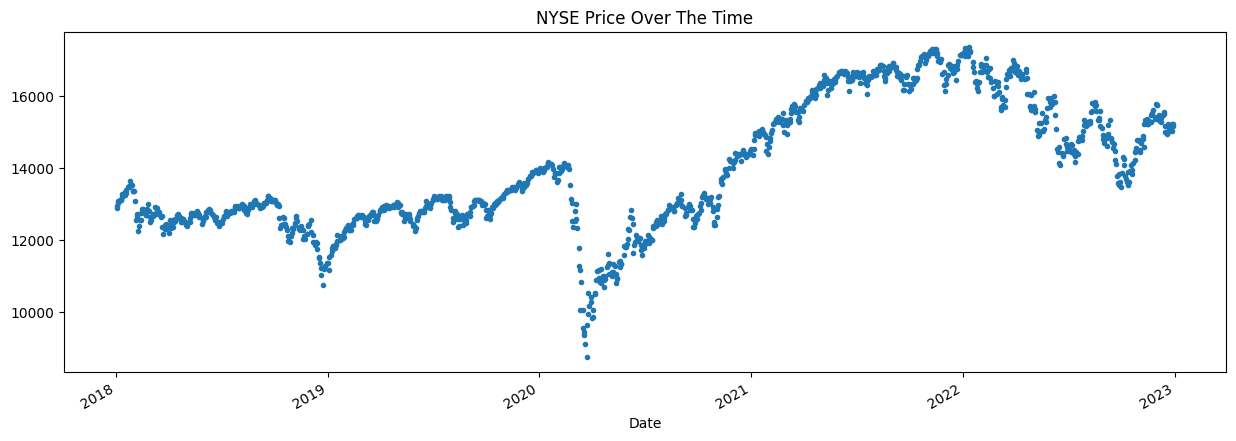

In [13]:
df['NYSE'].plot(style='.',
        figsize=(15, 5), 
        title='NYSE Price Over The Time')
plt.show()

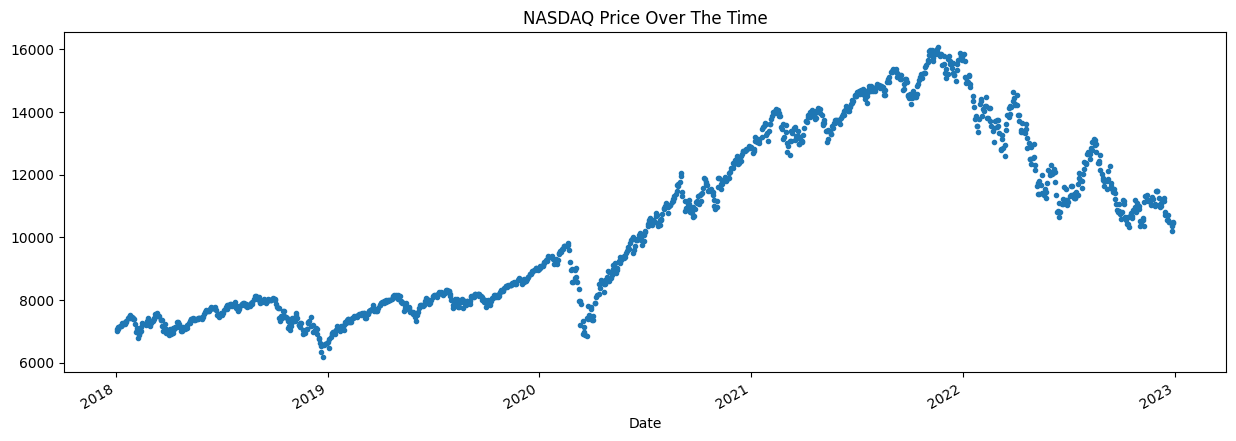

In [14]:
df['NASDAQ'].plot(style='.',
        figsize=(15, 5), 
        title='NASDAQ Price Over The Time')
plt.show()

<AxesSubplot: ylabel='Frequency'>

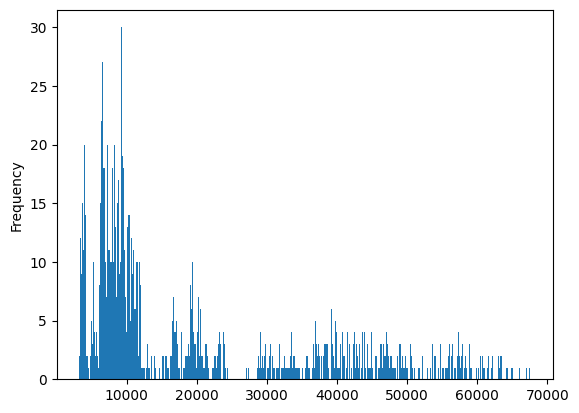

In [15]:
df['BTC'].plot(kind='hist', bins=500)

In [16]:
df['BTC'] = np.log1p(df['BTC'])

<AxesSubplot: ylabel='Frequency'>

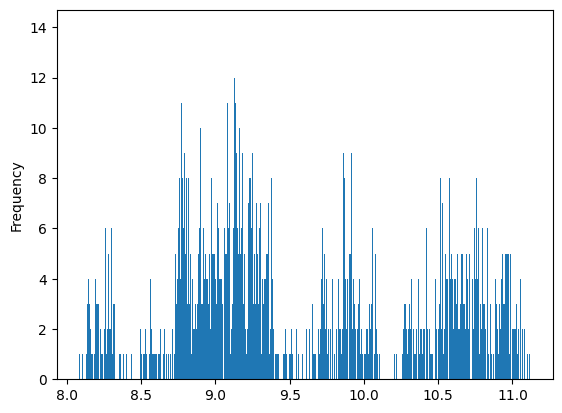

In [17]:
df['BTC'].plot(kind='hist', bins=500)

<AxesSubplot: ylabel='Frequency'>

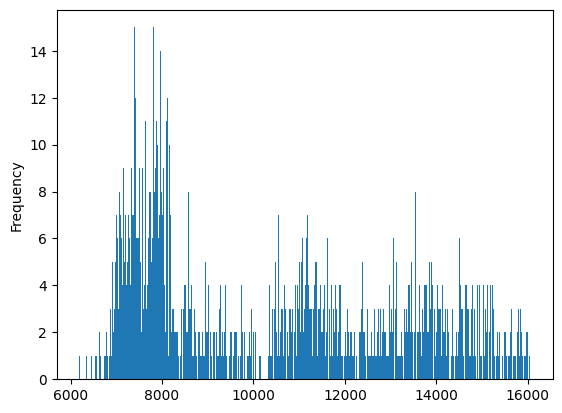

In [18]:
df['NASDAQ'].plot(kind='hist', bins=500)

<AxesSubplot: ylabel='Frequency'>

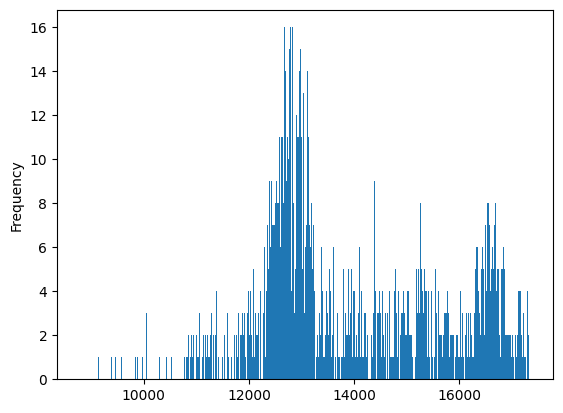

In [39]:
df['NYSE'].plot(kind='hist', bins=500)

In [20]:
target_map = df['BTC'].to_dict()
df['BTC+1'] = (df.index + pd.Timedelta('1 days')).map(target_map)
df['BTC+1'] = df['BTC+1'].fillna(method = 'ffill')

In [21]:
size = int(len(df) * 0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

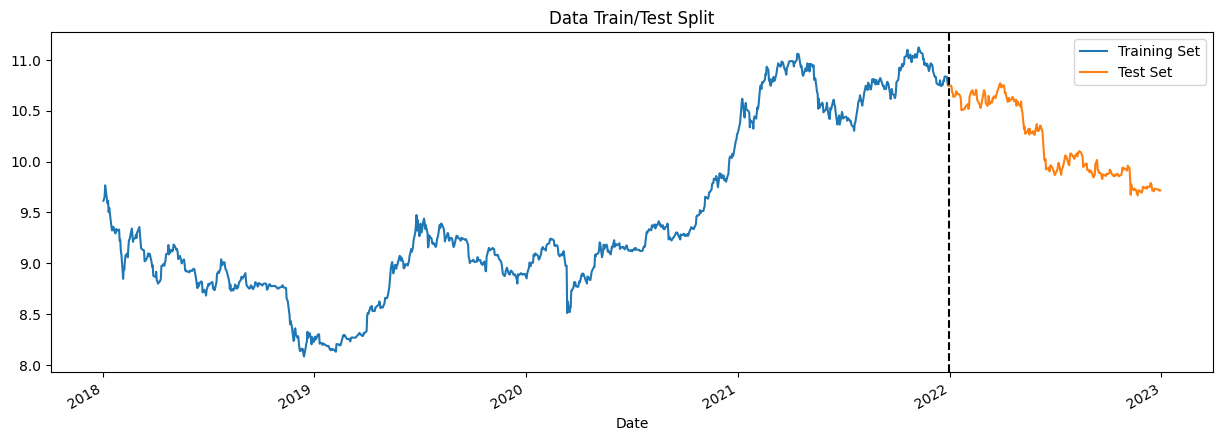

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
df_train['BTC'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test['BTC'].plot(ax=ax, label='Test Set')
ax.axvline('2021-12-31', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()


In [23]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    return df

df = create_features(df)

In [24]:
def add_lags(df):
    target_map = df['BTC'].to_dict()
    df['btc_lag1'] = (df.index - pd.Timedelta('1 days')).map(target_map)
    df['btc_lag2'] = (df.index - pd.Timedelta('2 days')).map(target_map)
    df['btc_lag3'] = (df.index - pd.Timedelta('3 days')).map(target_map)
    return df

In [25]:
df_train = df_train.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)
df_test = df_test.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)

In [40]:
x_train = create_features(df_train)
x_train = add_lags(x_train)
x_test = create_features(df_test)
x_test = add_lags(x_test)

In [41]:
y_train = x_train['BTC+1']
y_test = x_test['BTC+1']
x_train = x_train.drop(['BTC', 'BTC+1'], axis =1)
x_test = x_test.drop(['BTC','BTC+1'], axis = 1)

In [45]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/data.py:267: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:22:07] WARNING: /home/sat_bot/base/conda-bld/xgboost_1667827974456/work/src/objective/regression_obj.cu:198: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8.88229	validation_1-rmse:9.58714
[100]	validation_0-rmse:3.27015	validation_1-rmse:3.18231
[200]	validation_0-rmse:1.21249	validation_1-rmse:0.91301
[300]	validation_0-rmse:0.46054	validation_1-rmse:0.37979
[355]	validation_0-rmse:0.28159	validation_1-rmse:0.41908


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1,
             objective='reg:linear', predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1, ...)

In [46]:
y_pred = reg.predict(x_test)
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

10820.804988420196

In [47]:
pred_vs_actual = pd.DataFrame(data = [y_pred, y_test]).T
pred_vs_actual

,0,1
0,25910.253906,46306.44531
1,26929.544922,45897.57422
2,28545.068359,43569.00391
3,28545.068359,43160.92969
4,27257.988281,41557.90234
...,...,...
247,30663.943359,16796.95313
248,25910.253906,16552.57227
249,30663.943359,16642.34180
250,30663.943359,16602.58594


In [48]:
df['moving_avg'] = df['BTC'].rolling(window = 20).mean()
df['ema_12'] = df['BTC'].ewm(span = 12, adjust = False).mean()
df['ema_26'] = df['BTC'].ewm(span = 26, adjust = False).mean()
df['macd'] = df['ema_12'] - df['ema_26']
df['macd_signal'] = df['macd'].ewm(span=9, adjust = False).mean()
df.tail()

,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume,BTC+1,hour,...,quarter,month,year,dayofyear,dayofmonth,moving_avg,ema_12,ema_26,macd,macd_signal
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,9.729012,15188.45020,10497.86035,7130.0,1.532927e+10,2819280000,3544680000,141614,9.729012,0,...,4,12,2022,357,23,9.740093,9.737700,9.750343,-0.012642,-0.014429
2022-12-27,9.724252,15218.25977,10353.23047,7130.0,1.574858e+10,3030300000,3827290000,141614,9.714357,0,...,4,12,2022,361,27,9.741611,9.735631,9.748410,-0.012779,-0.014099
2022-12-28,9.714357,15037.32031,10213.29004,7128.0,1.700571e+10,3083520000,3842970000,490323,9.719766,0,...,4,12,2022,362,28,9.741937,9.732358,9.745888,-0.013529,-0.013985
2022-12-29,9.719766,15241.20996,10478.08984,7212.0,1.447224e+10,3003680000,4154100000,457006,9.717374,0,...,4,12,2022,363,29,9.740381,9.730421,9.743953,-0.013532,-0.013894
2022-12-30,9.717374,15184.30957,10466.48047,7136.0,1.592916e+10,2979870000,3959030000,226505,9.717374,0,...,4,12,2022,364,30,9.739295,9.728414,9.741984,-0.013570,-0.013829


In [49]:
size = int(len(df) * 0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [50]:
df_train = df_train.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)
df_test = df_test.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)

In [51]:
x_train = create_features(df_train)
x_train = add_lags(x_train)
x_test = create_features(df_test)
x_test = add_lags(x_test)
y_train = x_train['BTC+1']
y_test = x_test['BTC+1']
x_train = x_train.drop(['BTC', 'BTC+1'], axis =1)
x_test = x_test.drop(['BTC','BTC+1'], axis = 1)

In [52]:
x_train.fillna(method = 'ffill', inplace = True)
x_test.fillna(method = 'ffill', inplace = True)

In [53]:
x_train.drop(['hour', 'dayofweek', 'quarter', 'month', 'year'], axis = 1, inplace = True)
x_test.drop(['hour', 'dayofweek', 'quarter', 'month', 'year'], axis = 1, inplace = True)


In [54]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[21:24:40] WARNING: /home/sat_bot/base/conda-bld/xgboost_1667827974456/work/src/objective/regression_obj.cu:198: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8.88227	validation_1-rmse:9.58797
[100]	validation_0-rmse:3.26568	validation_1-rmse:3.34618
[200]	validation_0-rmse:1.20289	validation_1-rmse:1.14733


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/data.py:267: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[300]	validation_0-rmse:0.44588	validation_1-rmse:0.36062
[400]	validation_0-rmse:0.17131	validation_1-rmse:0.15719
[470]	validation_0-rmse:0.09536	validation_1-rmse:0.16168


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1,
             objective='reg:linear', predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1, ...)

In [55]:
y_pred = reg.predict(x_test)
y_test = np.expm1(y_test)
y_pred = np.expm1(y_pred)
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

4616.937833670281

In [56]:
pred_vs_actual = pd.DataFrame(data = [y_pred, y_test]).T
pred_vs_actual

,0,1
0,25631.761719,46306.44531
1,26611.328125,45897.57422
2,36935.074219,43569.00391
3,38315.562500,43160.92969
4,35955.722656,41557.90234
...,...,...
247,16093.525391,16796.95313
248,16093.525391,16552.57227
249,16093.525391,16642.34180
250,16093.525391,16602.58594


In [57]:
df['moving_avg'] = df['BTC'].rolling(window = 20).mean()
df['ema_12'] = df['BTC'].ewm(span = 12, adjust = False).mean()
df['ema_26'] = df['BTC'].ewm(span = 26, adjust = False).mean()
df['macd'] = df['ema_12'] - df['ema_26']
df['macd_signal'] = df['macd'].ewm(span=9, adjust = False).mean()
delta = df['BTC'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window = 14).mean()
avg_loss = loss.rolling(window = 14).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))
aroon_up = 100 * ((25 - (df['BTC'].rolling(25).apply(lambda x: x.argmax() + 1))) / 25)
aroon_down = 100 * ((25 - (df['BTC'].rolling(25).apply(lambda x: x.argmin() + 1))) / 25)
df['aroon_oscillator'] = aroon_up - aroon_down
df.tail()

,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume,BTC+1,hour,...,year,dayofyear,dayofmonth,moving_avg,ema_12,ema_26,macd,macd_signal,rsi,aroon_oscillator
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,9.729012,15188.45020,10497.86035,7130.0,1.532927e+10,2819280000,3544680000,141614,9.729012,0,...,2022,357,23,9.740093,9.737700,9.750343,-0.012642,-0.014429,47.428898,-64.0
2022-12-27,9.724252,15218.25977,10353.23047,7130.0,1.574858e+10,3030300000,3827290000,141614,9.714357,0,...,2022,361,27,9.741611,9.735631,9.748410,-0.012779,-0.014099,44.571205,-64.0
2022-12-28,9.714357,15037.32031,10213.29004,7128.0,1.700571e+10,3083520000,3842970000,490323,9.719766,0,...,2022,362,28,9.741937,9.732358,9.745888,-0.013529,-0.013985,45.543204,-60.0
2022-12-29,9.719766,15241.20996,10478.08984,7212.0,1.447224e+10,3003680000,4154100000,457006,9.717374,0,...,2022,363,29,9.740381,9.730421,9.743953,-0.013532,-0.013894,40.376468,-48.0
2022-12-30,9.717374,15184.30957,10466.48047,7136.0,1.592916e+10,2979870000,3959030000,226505,9.717374,0,...,2022,364,30,9.739295,9.728414,9.741984,-0.013570,-0.013829,41.158741,-48.0


In [58]:
target_map = df['BTC'].to_dict()
df['BTC+1'] = (df.index + pd.Timedelta('1 days')).map(target_map)
df['BTC+1'] = df['BTC+1'].fillna(method = 'ffill')

In [59]:
size = int(len(df) * 0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [60]:
df_train = df_train.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)
df_test = df_test.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)

In [61]:
y_train = df_train['BTC+1']
y_test = df_test['BTC+1']
x_train = df_train.drop(['BTC', 'BTC+1'], axis =1)
x_test = df_test.drop(['BTC','BTC+1'], axis = 1)

In [62]:
x_train.drop(['hour', 'dayofweek', 'quarter', 'month', 'year'], axis = 1, inplace = True)
x_test.drop(['hour', 'dayofweek', 'quarter', 'month', 'year'], axis = 1, inplace = True)

In [63]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[21:26:42] WARNING: /home/sat_bot/base/conda-bld/xgboost_1667827974456/work/src/objective/regression_obj.cu:198: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8.88227	validation_1-rmse:9.58797
[100]	validation_0-rmse:3.26596	validation_1-rmse:3.33269
[200]	validation_0-rmse:1.20417	validation_1-rmse:1.10963


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/data.py:267: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[300]	validation_0-rmse:0.44768	validation_1-rmse:0.33794
[400]	validation_0-rmse:0.17228	validation_1-rmse:0.14619
[468]	validation_0-rmse:0.09671	validation_1-rmse:0.15479


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1,
             objective='reg:linear', predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1, ...)

In [64]:
y_pred = reg.predict(x_test)
y_test = np.expm1(y_test)
y_pred = np.expm1(y_pred)
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

4175.68633517089

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8312131425144269

In [67]:
df = pd.read_csv("Dataset.csv")
df = df.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

(array([ 81.,  21., 125., 204., 251.,  41., 137.,  62., 173., 164.]),
 array([4.04315912, 4.08962751, 4.13609591, 4.1825643 , 4.22903269,
        4.27550109, 4.32196948, 4.36843787, 4.41490626, 4.46137466,
        4.50784305]),
 <BarContainer object of 10 artists>)

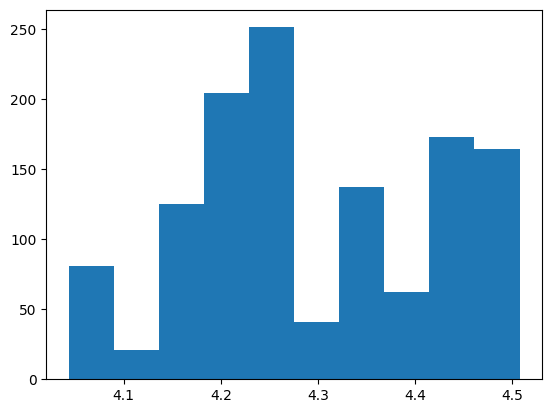

In [68]:
from scipy.stats import boxcox
data, lam_bda = boxcox(df['BTC'])
plt.hist(data)

In [69]:
df['BTC'] = data 
df.head()

,BTC
Date,
2018-01-02,4.311827
2018-01-03,4.314005
2018-01-04,4.317873
2018-01-05,4.334247
2018-01-08,4.313700


In [70]:
df['moving_avg'] = df['BTC'].rolling(window = 20).mean()
df['ema_12'] = df['BTC'].ewm(span = 12, adjust = False).mean()
df['ema_26'] = df['BTC'].ewm(span = 26, adjust = False).mean()
df['macd'] = df['ema_12'] - df['ema_26']
df['macd_signal'] = df['macd'].ewm(span=9, adjust = False).mean()
delta = df['BTC'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window = 14).mean()
avg_loss = loss.rolling(window = 14).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))
aroon_up = 100 * ((25 - (df['BTC'].rolling(25).apply(lambda x: x.argmax() + 1))) / 25)
aroon_down = 100 * ((25 - (df['BTC'].rolling(25).apply(lambda x: x.argmin() + 1))) / 25)
df['aroon_oscillator'] = aroon_up - aroon_down
df.tail()

,BTC,moving_avg,ema_12,ema_26,macd,macd_signal,rsi,aroon_oscillator
Date,,,,,,,,
2022-12-23,4.328831,4.330451,4.330099,4.331921,-0.001822,-0.002074,47.422805,-64.0
2022-12-27,4.328131,4.330675,4.329797,4.331641,-0.001844,-0.002028,44.559768,-64.0
2022-12-28,4.326673,4.330724,4.329316,4.331273,-0.001957,-0.002014,45.523933,-60.0
2022-12-29,4.327470,4.330495,4.329032,4.330991,-0.001959,-0.002003,40.362678,-48.0
2022-12-30,4.327118,4.330335,4.328738,4.330704,-0.001967,-0.001996,41.139918,-48.0


In [71]:
target_map = df['BTC'].to_dict()
df['BTC+1'] = (df.index + pd.Timedelta('1 days')).map(target_map)
df['BTC+1'] = df['BTC+1'].fillna(method = 'ffill')

In [72]:
size = int(len(df) * 0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]
y_train = df_train['BTC+1']
y_test = df_test['BTC+1']
x_train = df_train.drop(['BTC', 'BTC+1'], axis =1)
x_test = df_test.drop(['BTC','BTC+1'], axis = 1)

In [73]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[21:30:38] WARNING: /home/sat_bot/base/conda-bld/xgboost_1667827974456/work/src/objective/regression_obj.cu:198: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.73781	validation_1-rmse:3.85358
[100]	validation_0-rmse:1.37183	validation_1-rmse:1.39865
[200]	validation_0-rmse:0.50404	validation_1-rmse:0.49771
[300]	validation_0-rmse:0.18565	validation_1-rmse:0.16843


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/data.py:267: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[400]	validation_0-rmse:0.06892	validation_1-rmse:0.05283
[500]	validation_0-rmse:0.02651	validation_1-rmse:0.01981
[580]	validation_0-rmse:0.01373	validation_1-rmse:0.02010


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1,
             objective='reg:linear', predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1, ...)

In [74]:
from scipy.special import inv_boxcox
y_pred = reg.predict(x_test)
y_test = inv_boxcox(y_test,lam_bda)
y_pred = inv_boxcox(y_pred, lam_bda)
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

4147.233049544157

In [75]:
pred_vs_actual = pd.DataFrame(data = [y_pred, y_test]).T
pred_vs_actual.columns = ['Pred', 'Actual']
pred_vs_actual['Date'] = x_test.index + pd.Timedelta('1 days')
pred_vs_actual = pred_vs_actual.set_index('Date')
pred_vs_actual

,Pred,Actual
Date,,
2022-01-01,39248.378906,46306.44531
2022-01-04,38103.222656,45897.57422
2022-01-05,38099.738281,43569.00391
2022-01-06,37337.218750,43160.92969
2022-01-07,37433.304688,41557.90234
...,...,...
2022-12-24,15910.783203,16796.95313
2022-12-28,15692.584961,16552.57227
2022-12-29,15910.783203,16642.34180


<AxesSubplot: xlabel='Date'>

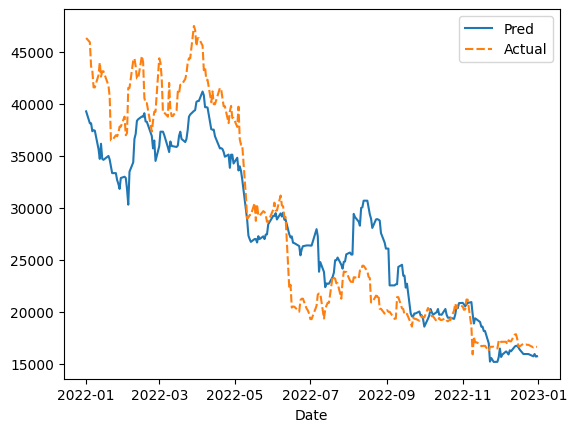

In [76]:
sns.lineplot(data = pred_vs_actual)